In [1]:
# Remove this cell
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("""
<style>
     #notebook { padding-top:0px !important; }
     .container { width:100% !important; }
     .end_space { min-height:0px !important; }
     div.prompt { min-width:0px; }
     .prompt { min-width:0px; }
     .output_area { background-color:#eeeeee;}
  </style>"""))


/tmp/ipykernel_8527/1177914014.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Initialize a tileset from a ND2 file

In [18]:
from exm.stitching.tileset import Tileset

project_path = "/home/yves/Private/Fixstars/datasets/ZebrafishBrain/20221017_alignment/"
nd2_file = f"{project_path}/20221017_alignment_slice1_final.nd2"
output_path = "/tmp/"

# Provide the voxel size
ts=Tileset([0.1625*2, 0.1625*2, 0.4])

ts.init_from_nd2(nd2_file)

### Preview a Z-slice

/home/yves/Private/Fixstars/repos/ExSeqProcessing2/exm/stitching/tileset.py:192: RuntimeWarning: invalid value encountered in true_divide
  newpic = newpic/div


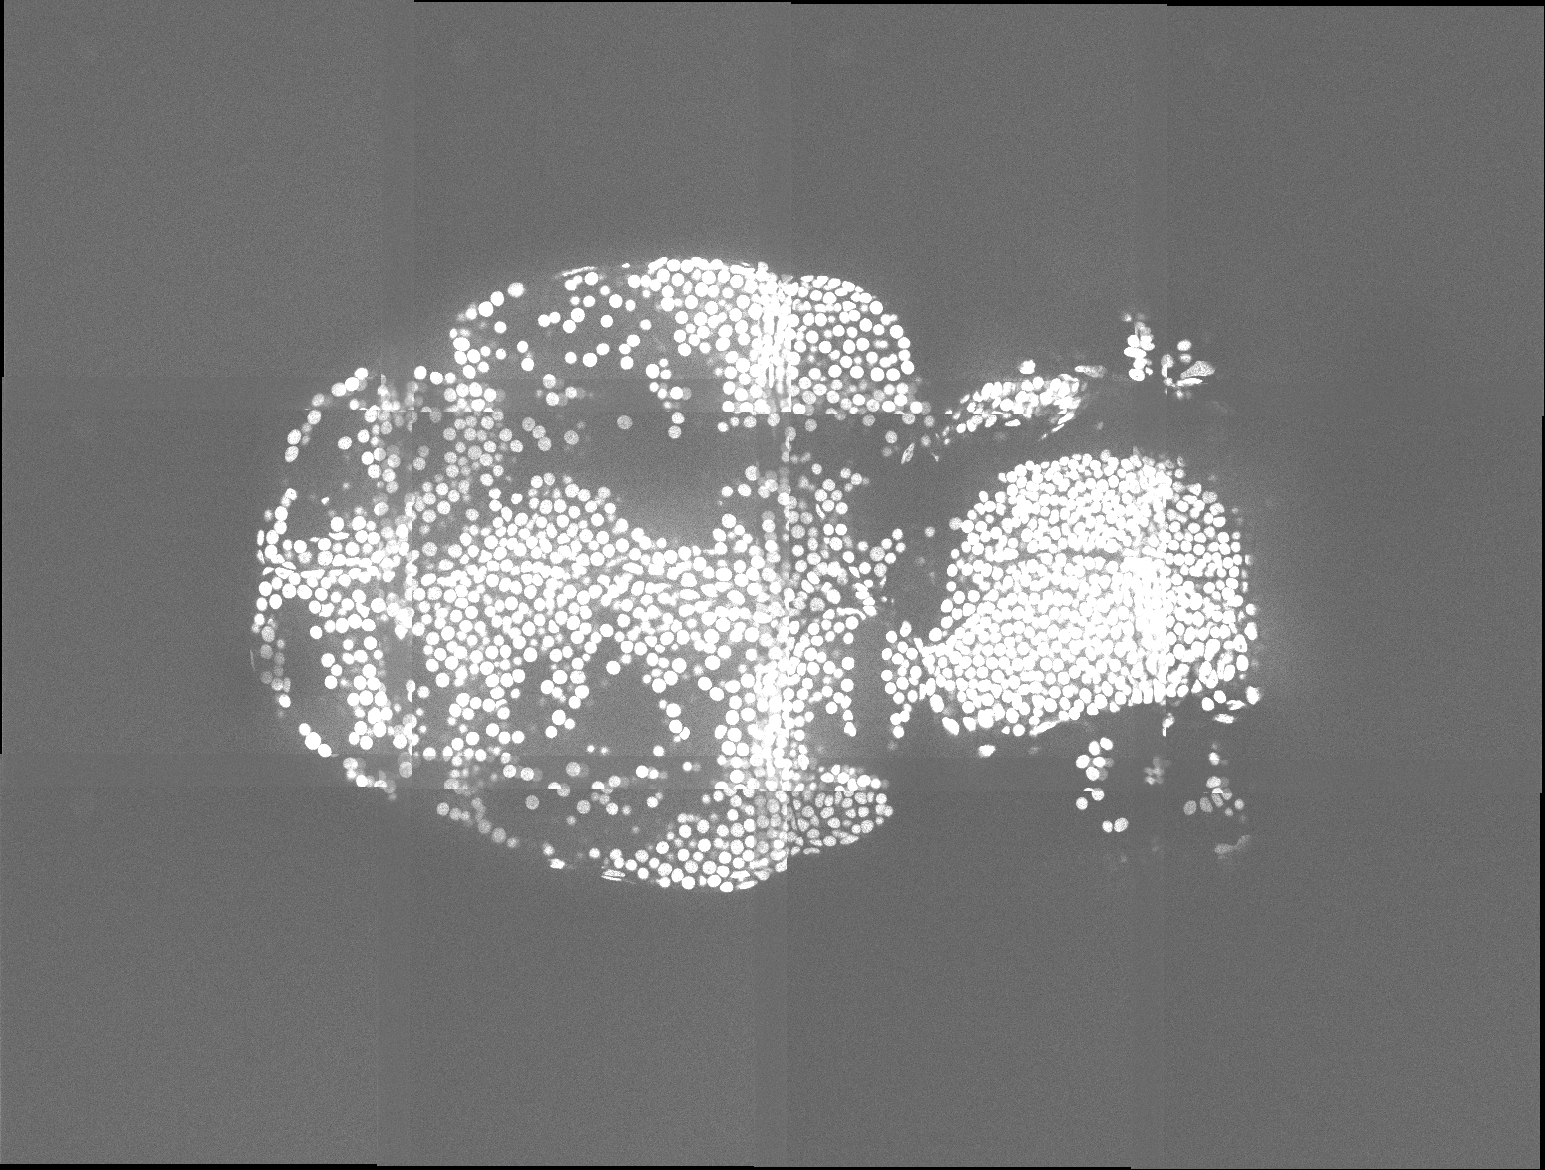

In [3]:
from exm.utils import display_img as di 

zslice = ts.preview_nd2(150)
di(zslice.T)

### Load a downscaled version of the tiles in memory

In [24]:
ts.load_all(downscale=[2,4,4])

### Scale intensities globally and converts to 8bpp

In [25]:
ts.scale_intensity()

### Produce an output volume

In [26]:
vol = ts.produce_output_volume()

In [27]:
vol.shape

(226, 1931, 1462)

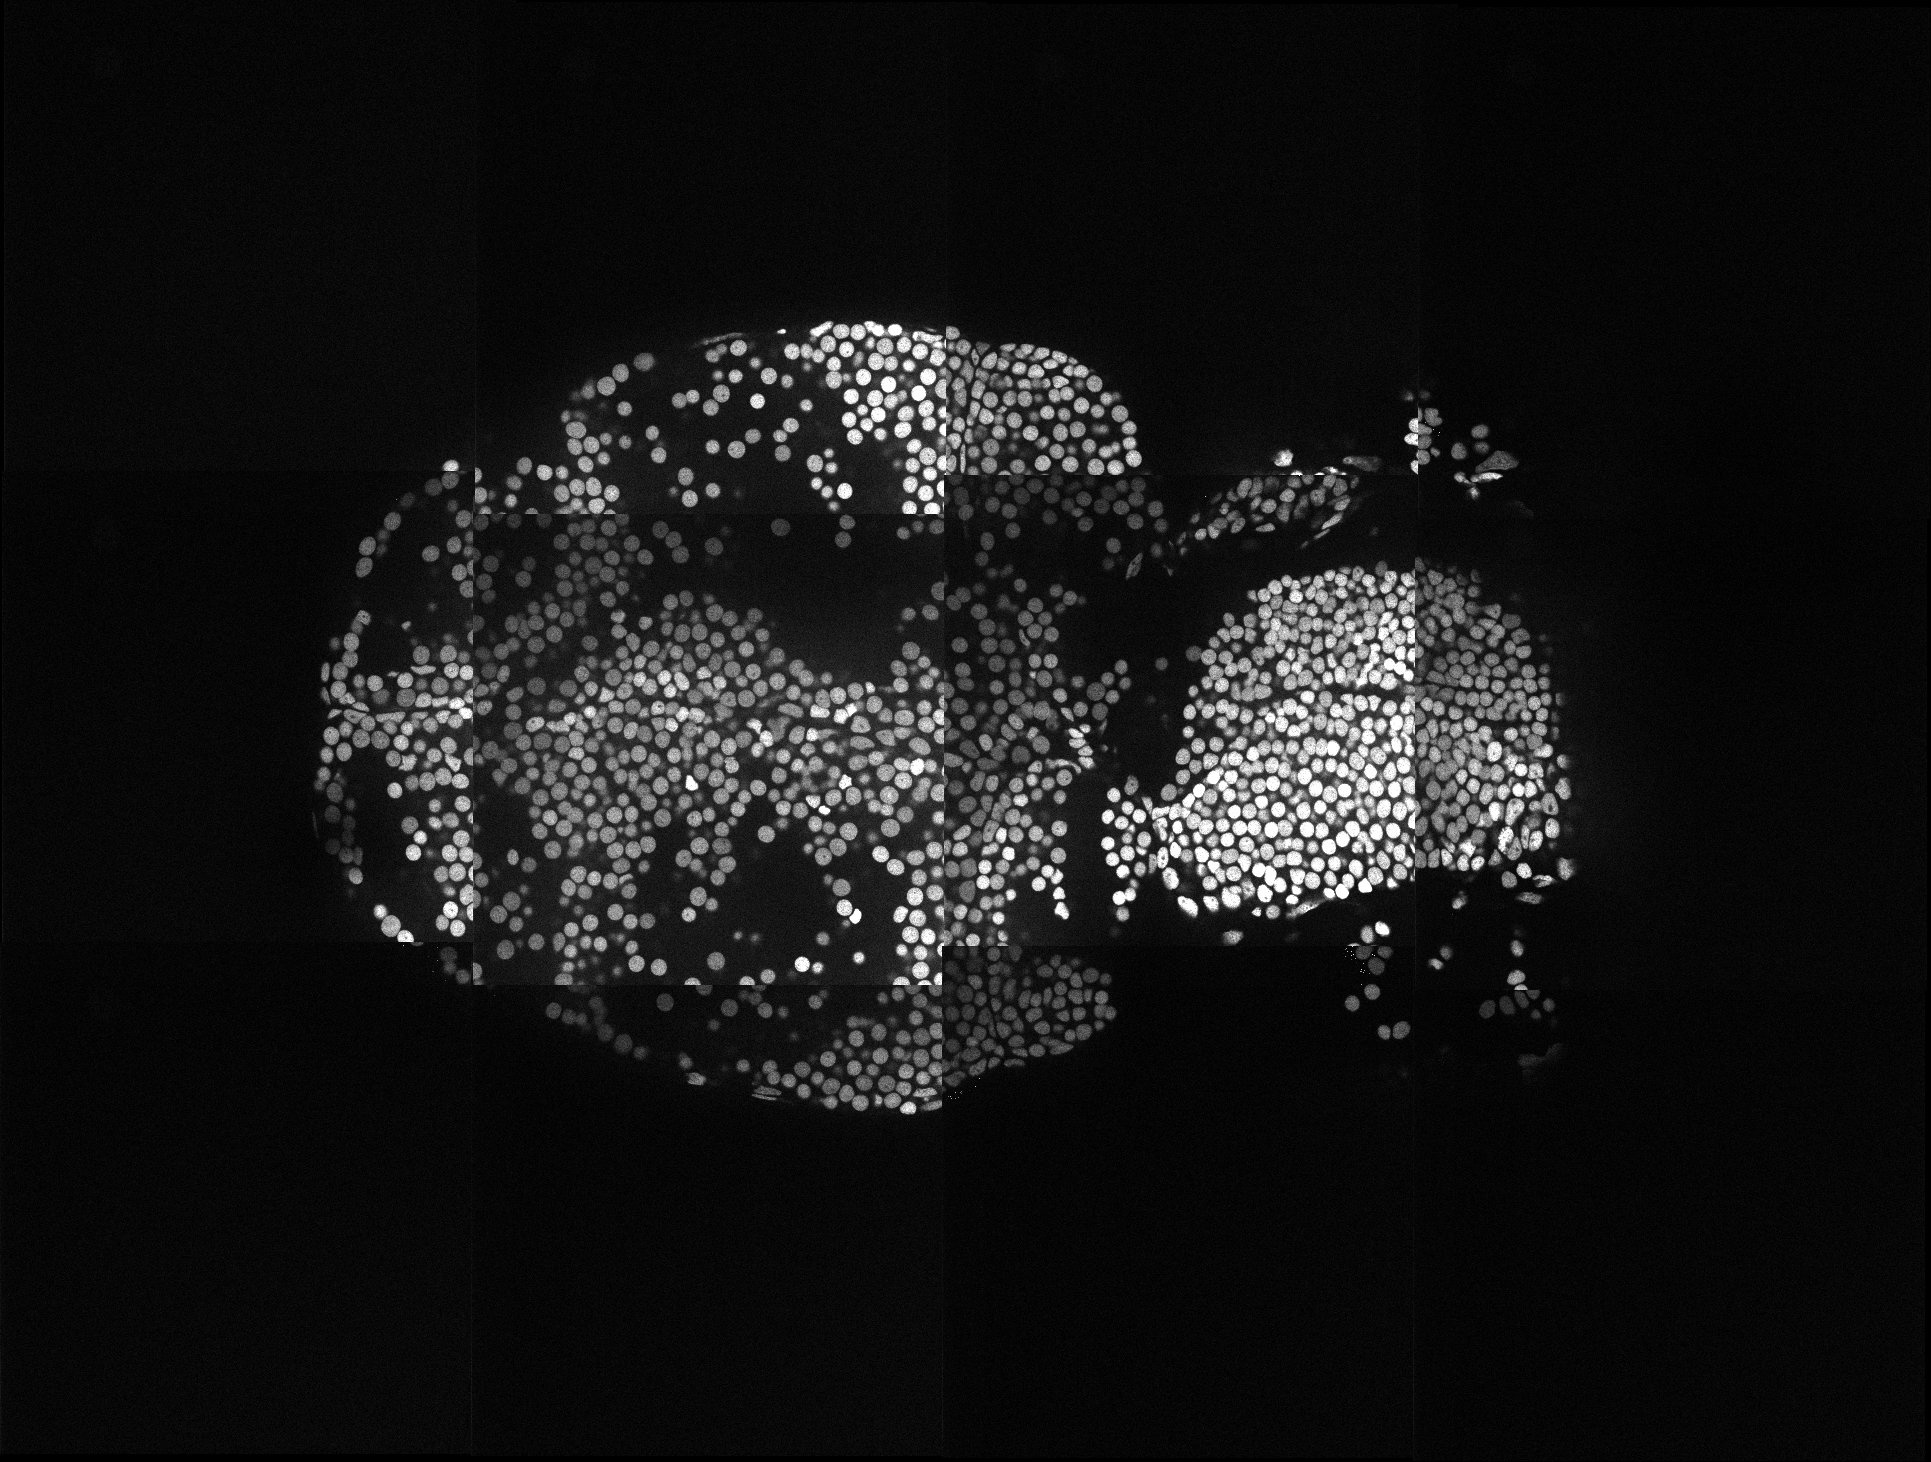

In [28]:
di(vol[150//2].T)

### Writing a H5/BDV file

In [29]:
ts.write_into_h5bdv(f"{output_path}/example_output.h5")